# Content Summarization Evaluation

Calculation of rouge scores requires a golden standard of summaries against which the summaries extracted by varioud models are computed. 

We use the dataset opiniosis (details below) to calculate rouge scores.

The following are the various models tried:

1. Word frequency model
2. Text Rank (Gensim)
3. BERT extractive summarizer
4. T5 huggingface transformer model
5. BART huggingface transformer model

In [1]:
import numpy as np
import pandas as pd

# 1. Opinosis Dataset
 - Contain **51 paragraphs** of user reviews on a given topic, obtained from Tripdvisor, Edmunds and Amazon
 - Each paragraph contains 100 sentence in average
 - Data file also contains **gold standard summaries** of each paragraph for test and validation
 
 https://kavita-ganesan.com/opinosis-opinion-dataset/#.Xe6Ya-hKhPY
 
 https://github.com/kavgan/opinosis-summarization

In [2]:
df = pd.read_csv('C:\My Github\EmergingTechnologiesProject\Experiments\datasets\opinosis.csv')

In [3]:
df

,text,topics,summary_number_1,summary_number_2,summary_number_3,summary_number_4,summary_number_5
0,", and is very, very accurate .\r\r\n but for t...",accuracy_garmin_nuvi_255W_gps,This unit is generally quite accurate. \r\r\n...,The Garmin seems to be generally very accurate...,"It is very accurate, even in destination time....",Very accurate with travel and destination time...,"Its accurate, fast and its simple operations m..."
1,"The room was not overly big, but clean and ve...",bathroom_bestwestern_hotel_sfo,The rooms were not large but were clean and ve...,"Rooms are not big, but clean and with comforta...",Bathrooms are satisfactory. \r\r\nThe rooms ar...,Bathrooms are mostly adequate sized and clean ...,People were most impressesd with the bathrooms...
2,After I plugged it in to my USB hub on my com...,battery-life_amazon_kindle,Battery life is exceptional.\r\r\nThe Kindle c...,Battery life is exceptional.\r\r\nThe Kindle c...,It can be a very difficult process when trying...,The battery life of the Kindle is very long.\r...,The battery life of the Kindle is very long.\r...
3,short battery life I moved up from an 8gb .\...,battery-life_ipod_nano_8gb,The battery life is too short.\r\r\nThe time b...,The battery life of the ipod nano is very shor...,The battery life of the Ipod Nano 8GB is far t...,"Battery life is very short, especially when yo...","Battery life short, especially for video."
4,"6GHz 533FSB cpu, glossy display, 3, Cell 23Wh ...",battery-life_netbook_1005ha,The battery life is longer then 5 hours.\r\r\n...,Battery lasts about 5 hours.\r\r\nTime is shor...,battery-life is fantastic and good.\r\r\nThe 6...,Battery lasts about 5 hours.\r\r\nTime is shor...,Battery lasts about 5 hours.\r\r\nTime is shor...
5,I thought it would be fitting to christen my K...,buttons_amazon_kindle,It is not user friendly and the buttons are no...,"The buttons are well placed, but can be hard t...",Magical five way button.\r\r\nNext page button...,New buttons are easy to use and effective.\r\r...,NaN
6,"Drivers seat not comfortable, the car itself ...",comfort_honda_accord_2008,The 2008 honda accord has an extremely uncomfo...,The driving position and the leather seats are...,"Comfort is ok, but the front seats are too fir...",The front seats are uncomfortable.\r\r\nThe co...,The seats are not comfortable as many other ca...
7,Ride seems comfortable and gas mileage fairly...,comfort_toyota_camry_2007,"The Camry offers interior comfort, while provi...",Overall very comfortable ride front and back.\...,Overall very comfortable ride front and back.\...,Its very comfortable for long trips.,Its very comfortable and a quiet ride with low...
8,You also get upscale features like spoken dir...,directions_garmin_nuvi_255W_gps,"The voice directions are good, it sometime wro...","The voice directions are good, it sometime wro...",Directions are usually accurate and easy to un...,"Directions are accurate, easy to see and under...",Turn-by-turn directions are accurate.\r\r\nDir...
9,3 quot widescreen display was a bonus .\r\r\n...,display_garmin_nuvi_255W_gps,Display is wide and clear.\r\r\nDisplay can ea...,"The new screen is large, clear, and bright.\r\...",The wide display of the 225 is very good.\r\r\...,"The display is bright, clear, and smooth.\r\r\...","Display is wide, laid out nice, and is very cl..."


In [4]:
## Clean the paragraph
def rm_rrn(string):
    if isinstance(string, str):
        return string.replace('\r\r\n',' ')

In [5]:
df = df.applymap(rm_rrn)

#### An example paragraph: text1

In [6]:
text1 = df['text'][0]
text1

", and is very, very accurate .  but for the most part, we find that the Garmin software provides accurate directions, whereever we intend to go .  This function is not accurate if you don't leave it in battery mode say, when you stop at the Cracker Barrell for lunch and to play one of those trangle games with the tees .  It provides immediate alternatives if the route from the online map program was inaccurate or blocked by an obstacle .  I've used other GPS units, as well as GPS built into cars   and to this day NOTHING beats the accuracy of a Garmin GPS .  It got me from point A to point B with 100% accuracy everytime .  It has yet to disappoint, getting me everywhere with 100% accuracy . 0 out of 5 stars Honest, accurate review, , PLEASE READ !  Aside from that, every destination I've thrown at has been 100% accurate . In closing, this is a fantastic GPS with some very nice features and is very accurate in directions .  Plus, I've always heard that there are  quirks  with any GPS b

#### Human written summary of text1

In [7]:
df['summary_number_1'][0]

'This unit is generally quite accurate.   Set-up and usage are considered to be very easy.  The maps can be updated, and tend to be reliable. '

In [8]:
#pip install rouge --user

## 2. Rouge Score for text summarization

In [9]:
from rouge import Rouge
rouge = Rouge()

In [10]:
rouge.get_scores(df['summary_number_2'][0], df['summary_number_1'][0])

[{'rouge-1': {'f': 0.3809523762358277, 'p': 0.5, 'r': 0.3076923076923077},
  'rouge-2': {'f': 0.04999999531250044, 'p': 0.06666666666666667, 'r': 0.04},
  'rouge-l': {'f': 0.37837837355734116,
   'p': 0.4666666666666667,
   'r': 0.3181818181818182}}]

# 3. Word Frequency Algorithm
Bag of words based algorithm
 - compute word frequency
 - score each sentence according to word frequency (can be weighted)
 - generate threshold of sentence selection (average score, etc.)
 - Selected sentence (score > threshold) as summary

In [11]:
import word_frequency_model as wf

#### summary of word frequency model on text1
1-gram F1-score: 0.156

In [12]:
wf_summary1 = wf.summarize_text_wf(text1) ## summary output from 
wf_summary1

" , and is very, very accurate . It has yet to disappoint, getting me everywhere with 100% accuracy . Aside from that, every destination I've thrown at has been 100% accurate . DESTINATION TIME, , This is pretty accurate too . But, it's always very accurate . Most of the times, this info was very accurate . The directions are highly accurate down to a  T  . It was accurate to the minute when it told me when I would arrive home . The accuracy at this point is very good . Accuracy is as good as any other unit, they all sometimes tell you you have arrived when you haven't, or continue to tell you to turn when you're already there . Accuracy is determined by the maps . Accuracy is within a few yards . Easy to use, excellent accuracy, nice and intuitive interface . The directions provided have all been quite accurate thus far . Easy to use and amazed at how accurate this item is . Mounted really easily and has been very accurate . seems to be rather accurate . It was accurate on determing o

In [13]:
rouge.get_scores(wf_summary1, df['summary_number_1'][0])

[{'rouge-1': {'f': 0.11764705674740487, 'p': 0.06666666666666667, 'r': 0.5},
  'rouge-2': {'f': 0.01826483816017203, 'p': 0.010309278350515464, 'r': 0.08},
  'rouge-l': {'f': 0.15602836616065593, 'p': 0.09243697478991597, 'r': 0.5}}]

# 4. TextRank Algorithms


### Pytextrank package

In [14]:
import textrank_graph_model as tr

In [15]:
tr_summary1 = tr.gensim_summarize(text1) # summary output fro gensim package
tr_summary1

"In closing, this is a fantastic GPS with some very nice features and is very accurate in directions .\nThe map is pretty accurate and the Point of interest database also is good .\nThe most accurate review stated that these machines are adjunct to a good map and signs on the interstate .\nWhile the 255W routing seems generally accurate and logical, on my first use I discovered that it does have some errors in its internal map .\nIt has worked well for local driving giving accurate directions for roads and streets .\nLess traveled rural roads will not be accurate on any unit .\nThe Garmin is loaded with very accurate maps that generally know the roads in even the remotest areas .\nI'm really glad I bought it though, and like the easy to read graphics, the voice used to tell you the name of the street you are to turn on, the uncannily accurate estimates of mileage and time of arrival at your destination .\nMy new Garmin 255w had very Easy Set Up, Accurate Directions to locations, User F

**summary of text rank model on text1**

1-gram F1-score: 0.156

In [16]:
rouge.get_scores(tr_summary1, df['summary_number_1'][0])

[{'rouge-1': {'f': 0.11111110937064472,
   'p': 0.06147540983606557,
   'r': 0.5769230769230769},
  'rouge-2': {'f': 0.014925371442693442, 'p': 0.00823045267489712, 'r': 0.08},
  'rouge-l': {'f': 0.14371257256265915,
   'p': 0.08275862068965517,
   'r': 0.5454545454545454}}]

## 5. Kmean clustering of sentence embedding using Bert

### 5. 1 BERT pretrained pytorch model 

In [17]:
import bert_clustering_summary as bs

In [18]:
bs_summary1 = bs.bertSummarize(text1)
bs_summary1

", and is very, very accurate . Plus, I've always heard that there are  quirks  with any GPS being accurate, having POIs, etc . The most accurate review stated that these machines are adjunct to a good map and signs on the interstate . Depending on what you are using it for, it is a nice adjunct to a travel trip and the directions are accurate and usually the quickest, but not always . but after that it is very easy and quite accurate to use . It loads quickly, have pretty accurate directions, and can recalculate quickly when I miss a turn . I used it the day I bought it,   and then this morning, and as soon as it comes on it is  ready to navigate  The only downfall of this product, and the only reason I did not give it 5 stars is the fact that the speed limit it displays for the road you are on isn't 100% accurate . The estimated time to arrival does not seem to calculate the travelling time accurately . Speed of calculation, accuracy, and simplicity of operation are top notch ."

**Summary of BERT clustering model on text1**

1-gram F1-score: 0.155

In [19]:
rouge.get_scores(bs_summary1, df['summary_number_1'][0])

[{'rouge-1': {'f': 0.11538461319711542,
   'p': 0.06593406593406594,
   'r': 0.46153846153846156},
  'rouge-2': {'f': 0.01941747359553233, 'p': 0.011049723756906077, 'r': 0.08},
  'rouge-l': {'f': 0.13432835546446878,
   'p': 0.08035714285714286,
   'r': 0.4090909090909091}}]

### 5.2 Another package using similar implementation
bert-extractive-summarizer

In [20]:
from summarizer import Summarizer

C:\ProgramData\Anaconda3\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [21]:
model = Summarizer()

In [22]:
bert_sum = model(text1)

**summary of bert-extractive-summarizer on text1**

1-gram F1-score: 0.149

In [23]:
rouge.get_scores(bert_sum, df['summary_number_1'][0])

[{'rouge-1': {'f': 0.0991735518011065,
   'p': 0.05555555555555555,
   'r': 0.46153846153846156},
  'rouge-2': {'f': 0.008333331467014305, 'p': 0.004651162790697674, 'r': 0.04},
  'rouge-l': {'f': 0.122448977046601, 'p': 0.072, 'r': 0.4090909090909091}}]

## T5 text summarization

In [24]:
#!pip install sentencepiece

In [25]:
import BART_T5 as bartT5

Some weights of the model checkpoint at t5-base were not used when initializing T5ForConditionalGeneration: ['decoder.block.0.layer.1.EncDecAttention.relative_attention_bias.weight']
- This IS expected if you are initializing T5ForConditionalGeneration from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing T5ForConditionalGeneration from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [26]:
t5Summaries = bartT5.t5_summarize(text1)

Token indices sequence length is longer than the specified maximum sequence length for this model (1539 > 512). Running this sequence through the model will result in indexing errors


In [27]:
t5Summaries

'0 out of 5 stars Very accurate, very easy to use, and is very, very accurate . but for the most part, the Garmin software provides accurate directions, whereever we intend to go . it provides immediate alternatives'

In [28]:
rouge.get_scores(t5Summaries, df['summary_number_1'][0])

[{'rouge-1': {'f': 0.22580644674297617,
   'p': 0.19444444444444445,
   'r': 0.2692307692307692},
  'rouge-2': {'f': 0.03333332847222294, 'p': 0.02857142857142857, 'r': 0.04},
  'rouge-l': {'f': 0.1886792404271984,
   'p': 0.16129032258064516,
   'r': 0.22727272727272727}}]

## BART Text summarization

In [29]:
bartSummaries = bartT5.bart_summarize(text1[:512])
bartSummaries

",etc., and is very, very accurate . but for the most part, we find that the Garmin software provides accurate directions, whereever we intend to go . This function is not accurate if you don't leave it in battery"

In [30]:
rouge.get_scores(bartSummaries, df['summary_number_1'][0])

[{'rouge-1': {'f': 0.18749999517578136,
   'p': 0.15789473684210525,
   'r': 0.23076923076923078},
  'rouge-2': {'f': 0.0, 'p': 0.0, 'r': 0.0},
  'rouge-l': {'f': 0.21818181338181827,
   'p': 0.18181818181818182,
   'r': 0.2727272727272727}}]

## 6. Test and Compare using Opinosis Dataset

### 6.1 Produce summary and compute ROUGE score from each model

In [31]:
df.columns

Index(['text', 'topics', 'summary_number_1', 'summary_number_2',
       'summary_number_3', 'summary_number_4', 'summary_number_5'],
      dtype='object')

In [33]:
df = df[:10]

In [34]:
df

,text,topics,summary_number_1,summary_number_2,summary_number_3,summary_number_4,summary_number_5,wf_summary
0,", and is very, very accurate . but for the mo...",accuracy_garmin_nuvi_255W_gps,This unit is generally quite accurate. Set-u...,The Garmin seems to be generally very accurate...,"It is very accurate, even in destination time.",Very accurate with travel and destination time...,"Its accurate, fast and its simple operations m...",", and is very, very accurate . It has yet to ..."
1,"The room was not overly big, but clean and ve...",bathroom_bestwestern_hotel_sfo,The rooms were not large but were clean and ve...,"Rooms are not big, but clean and with comforta...",Bathrooms are satisfactory. The rooms are cle...,Bathrooms are mostly adequate sized and clean ...,People were most impressesd with the bathrooms...,"Large comfortable room, wonderful bathroom . ..."
2,After I plugged it in to my USB hub on my com...,battery-life_amazon_kindle,Battery life is exceptional. The Kindle can ru...,Battery life is exceptional. The Kindle can ru...,It can be a very difficult process when trying...,The battery life of the Kindle is very long. A...,The battery life of the Kindle is very long. A...,"NO USER REPLACEABLE BATTERY, , Unless you buy..."
3,short battery life I moved up from an 8gb . ...,battery-life_ipod_nano_8gb,The battery life is too short. The time betwee...,The battery life of the ipod nano is very shor...,The battery life of the Ipod Nano 8GB is far t...,"Battery life is very short, especially when yo...","Battery life short, especially for video.",short battery life I moved up from an 8gb ....
4,"6GHz 533FSB cpu, glossy display, 3, Cell 23Wh ...",battery-life_netbook_1005ha,The battery life is longer then 5 hours. But d...,Battery lasts about 5 hours. Time is shorter w...,battery-life is fantastic and good. The 6 hour...,Battery lasts about 5 hours. Time is shorter w...,Battery lasts about 5 hours. Time is shorter w...,"6GHz 533FSB cpu, glossy display, 3, Cell 23Wh..."
5,I thought it would be fitting to christen my K...,buttons_amazon_kindle,It is not user friendly and the buttons are no...,"The buttons are well placed, but can be hard t...",Magical five way button. Next page button on b...,New buttons are easy to use and effective. No ...,None,The gadget feeling is underlined by needing t...
6,"Drivers seat not comfortable, the car itself ...",comfort_honda_accord_2008,The 2008 honda accord has an extremely uncomfo...,The driving position and the leather seats are...,"Comfort is ok, but the front seats are too fir...",The front seats are uncomfortable. The contour...,The seats are not comfortable as many other ca...,"Drivers seat not comfortable, the car itself..."
7,Ride seems comfortable and gas mileage fairly...,comfort_toyota_camry_2007,"The Camry offers interior comfort, while provi...",Overall very comfortable ride front and back. ...,Overall very comfortable ride front and back. ...,Its very comfortable for long trips.,Its very comfortable and a quiet ride with low...,"Seats are fine, in fact of all the smaller se..."
8,You also get upscale features like spoken dir...,directions_garmin_nuvi_255W_gps,"The voice directions are good, it sometime wro...","The voice directions are good, it sometime wro...",Directions are usually accurate and easy to un...,"Directions are accurate, easy to see and under...",Turn-by-turn directions are accurate. Directio...,You also get upscale features like spoken di...
9,3 quot widescreen display was a bonus . This...,display_garmin_nuvi_255W_gps,Display is wide and clear. Display can easily ...,"The new screen is large, clear, and bright. In...",The wide display of the 225 is very good. It m...,"The display is bright, clear, and smooth. Disp...","Display is wide, laid out nice, and is very cl...",3 quot widescreen display was a bonus . The ...


In [35]:
df['wf_summary'] = df['text'].apply(lambda x: wf.summarize_text_wf(x))
df['wf_rouge1_f1'] = df[['wf_summary','summary_number_1']]. \
                apply(lambda x: rouge.get_scores(x[0],x[1])[0]['rouge-1']['f'],axis=1)

In [36]:
df['tr_summary'] = df['text'].apply(lambda x: tr.gensim_summarize(x))
df['tr_rouge1_f1'] = df[['tr_summary','summary_number_1']]. \
                apply(lambda x: rouge.get_scores(x[0],x[1])[0]['rouge-1']['f'],axis=1)

In [37]:
df['bs_summary'] = df['text'].apply(lambda x: bs.bertSummarize(x))
df['bs_rouge1_f1'] = df[['bs_summary','summary_number_1']]. \
                apply(lambda x: rouge.get_scores(x[0],x[1])[0]['rouge-1']['f'],axis=1)

In [38]:
df['t5summary'] = df['text'].apply(lambda x: bartT5.t5_summarize(x))
df['t5_rouge1_f1'] = df[['t5summary','summary_number_1']]. \
                apply(lambda x: rouge.get_scores(x[0],x[1])[0]['rouge-1']['f'],axis=1)

In [39]:
np.mean(df['tr_rouge1_f1']),np.mean(df['wf_rouge1_f1']),np.mean(df['bs_rouge1_f1']), np.mean(df['t5_rouge1_f1'])

(0.06394185333149788,
 0.0492209145137948,
 0.08917247477219341,
 0.16434411440535387)

In [ ]:
df.to_csv('opniosis with summary.csv')

### 6.2 Plot and Compare

In [40]:
from matplotlib import pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'ROUGE-1 Score Density')

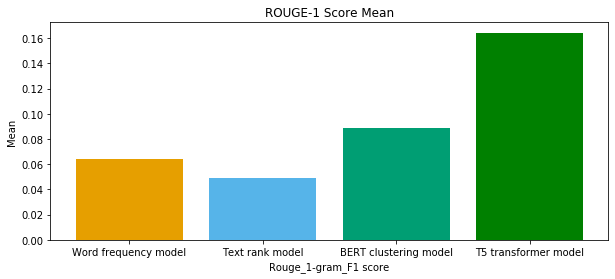

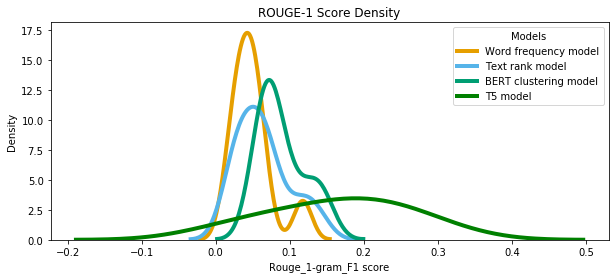

In [42]:
plt.figure(figsize=(10,4))

x = ['Word frequency model','Text rank model','BERT clustering model', 'T5 transformer model']
ROUGE1_mean = [0.06394185333149788, 0.0492209145137948, 0.08917247477219341, 0.16434411440535387]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, ROUGE1_mean, color=['#E69F00','#56B4E9','#009E73', '#008000'])


plt.xlabel('Rouge_1-gram_F1 score')
plt.ylabel('Mean')
plt.title("ROUGE-1 Score Mean")

plt.xticks(x_pos, x)

plt.figure(figsize=(10,4))

sns.distplot(df['wf_rouge1_f1'], hist=False, kde=True, color = '#E69F00', 
             kde_kws={'linewidth': 4},label='Word frequency model')

sns.distplot(df['tr_rouge1_f1'], hist=False, kde=True,color = '#56B4E9',
             kde_kws={'linewidth': 4},label='Text rank model')

sns.distplot(df['bs_rouge1_f1'], hist=False, kde=True,color = '#009E73',
             kde_kws={'linewidth': 4},label='BERT clustering model')

sns.distplot(df['t5_rouge1_f1'], hist=False, kde=True,color = '#008000',
             kde_kws={'linewidth': 4},label='T5 model')

plt.legend(prop={'size': 10}, title = 'Models')

plt.xlabel('Rouge_1-gram_F1 score')
plt.ylabel('Density')
plt.title("ROUGE-1 Score Density")


# References

1. https://github.com/RaRe-Technologies/gensim/tree/develop/gensim/summarization
2. https://github.com/DerwenAI/pytextrank/blob/master/explain_summ.ipynb
3. https://pypi.org/project/pytorch-pretrained-bert/
4. https://github.com/dmmiller612/bert-extractive-summarizer